# Planar Flow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import itertools

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
def mvn_pdf(X, mu=np.array([[0, 0]]), sig=np.array([[1, 0.], [0., 1]])):
    import numpy.linalg as LA
    sqrt_det_2pi_sig = np.sqrt(2 * np.pi * LA.det(sig))
    sig_inv = LA.inv(sig)
    X = X[:, None, :] - mu[None, :, :]
    return np.exp(-np.matmul(np.matmul(X, np.expand_dims(sig_inv, 0)), (X.transpose(0, 2, 1)))/2)/sqrt_det_2pi_sig

Let $\mathbf{z}\sim q_0(\mathbf{z})$ where $q_0(\mathbf{z}) = \mathcal{N}(\mathbf{z};\mathbf{0},\mathbf{I})$.  
Let $f(\mathbf{z})$ be an invertible transformation given by 
$$ \mathbf{y} = f(\mathbf{z}) = \mathbf{z} + \mathbf{u}h(\mathbf{w}^\top\mathbf{z}+b)$$
The pdf of $\mathbf{y}$ is given by
$$q_1(\mathbf{y}) = q_0(\mathbf{z})\left|\det\frac{\partial f}{\partial \mathbf{z}}\right|^{-1}$$
where $\left|\det\frac{\partial f}{\partial \mathbf{z}}\right|$ can be computed as follows
$$ \psi(\mathbf{z}) = h'(\mathbf{w}^\top\mathbf{z}+b)\mathbf{w} $$
$$\left|\det\frac{\partial f}{\partial \mathbf{z}}\right| = |1 + \mathbf{u}^\top\psi(\mathbf{z})|$$
Here, we set $h(x)=\tanh(x)$ which gives us $h'(x)=(1-\tanh^2(x))$

In [3]:
w = np.array([5., 0])
u = np.array([1., 0])
b = 0

def h(x):
    return np.tanh(x)

def h_prime(x):
    return 1 - np.tanh(x) ** 2

def f(z):
    y = z + np.dot(h(np.dot(z, w) + b).reshape(-1,1), u.reshape(1,-1))
    return y

def det_J(z):
    psi = h_prime(np.dot(z, w) + b).reshape(-1,1) * w
    det = np.abs(1 + np.dot(psi, u.reshape(-1,1)))
    return det

Let's set some values of $\mathbf{z}$ and see how $f$ moves $\mathbf{z}$ around in the 2D space.

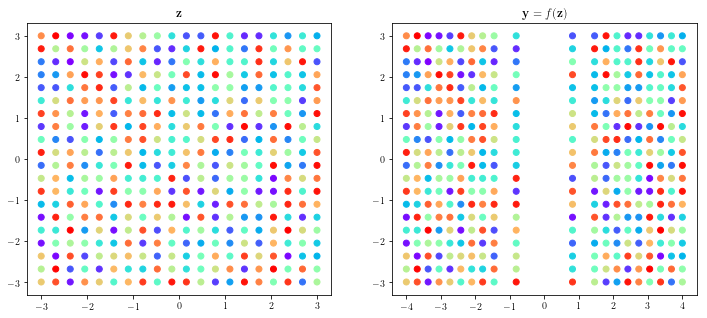

In [4]:
r = np.linspace(-3, 3, 20)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])
fig, axn = plt.subplots(ncols=2, nrows=1, figsize=[12, 5])
colors = np.random.rand(z.shape[0])
axn[0].scatter(z[:, 0], z[:, 1], c=colors, cmap='rainbow')
axn[0].set_title(r'$\mathbf{z}$')
y = f(z)
axn[1].scatter(y[:, 0], y[:, 1], c=colors, cmap='rainbow')
axn[1].set_title(r'$\mathbf{y} = f(\mathbf{z}$)')
plt.show()

## Analytic Density

In [5]:
r = np.linspace(-3, 3, 1000)
z = np.array(np.meshgrid(r, r)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

Let's plot the probability density $q_0(\mathbf{z})$.

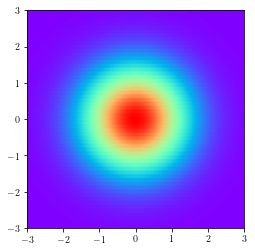

In [6]:
q0 = mvn_pdf(z)
plt.hexbin(z[:,0], z[:,1], C=q0.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

Now, let's compute $\mathbf{y} = f(\mathbf{z})$ and the density $q_1(\mathbf{y})$. Note that we not inverting $f$. Instead, we are first setting a $\mathbf{z}$ and then plotting the density $q_1(\mathbf{y})$ at corresponding $\mathbf{y}$s.

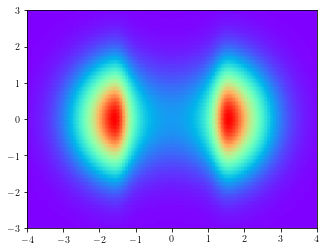

In [7]:
q1 = q0.squeeze()/det_J(z).squeeze()
y = f(z)
plt.hexbin(y[:,0], y[:,1], C=q1.squeeze(), cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.show()

## Empirical Density
Now, let's sample some $\mathbf{z}$s from $q_0$ and plot a 2D histogram.

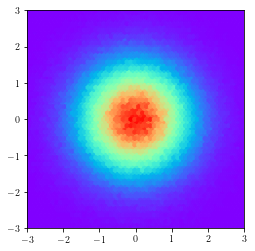

In [8]:
z = np.random.normal(size=(int(1e6),2))
plt.hexbin(z[:,0], z[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

Compute the $\mathbf{y} = f(\mathbf{z})$ and plot the histogram. The empirical density looks like the analytic density $q_1$.

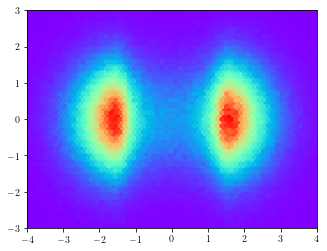

In [9]:
y = f(z)
plt.hexbin(y[:,0], y[:,1], cmap='rainbow')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-4, 4])
plt.ylim([-3, 3])
plt.show()